# K-means 法の実験

In [1]:
import numpy as np
import numpy.matlib
import matplotlib.pyplot as plt
from matplotlib import font_manager
from sklearn.cluster import KMeans
import pandas as pd
from mpl_toolkits.mplot3d import Axes3D
# %matplotlib　notebook
%matplotlib　inline
% config InlineBackend.figure_format='retina'

# 実験１仮想成績データのクラスタリング

# 仮想データの生成

In [2]:
# ダミーデータの生成　　　　日常点、試験点
np.random.seed(1)
data1 = np.round(np.random.multivariate_normal([45,45],[[8,0],[0,8]],30),1)  # どちらもよい
data2 = np.round(np.random.multivariate_normal([40,18],[[10,0],[0,10]],30),1)  # 日常点はよいが試験はいまいち
data3 = np.round(np.random.multivariate_normal([28,28],[[10,0],[0,10]],30),1)  #  凡庸
data４ = np.round(np.random.multivariate_normal([18,40],[[10,0],[0,10]],30),1)  # 日常点は悪いが試験はできる
data５ = np.round(np.random.multivariate_normal([10,10],[[8,0],[0,20]],30),1)  # だめだめ

data = np.r_[data1,data2,data3,data4,data5]
rank = np.r_[np.array(['A']*30),np.array(['B']*30),np.array(['C']*30),np.array(['D']*30),np.array(['E']*30)]
df = pd.DataFrame(data,columns=['Nichijo','Siken'])
df['Rank']=rank
df= df.reindex(np.random.permutation(df.index)).reset_index(drop=True)
df.head(5) #  頭から 5個だけ表示

,Nichijo,Siken,Rank
0,14.1,42.8,D
1,10.5,10.1,E
2,22.9,40.3,D
3,27.6,27.6,C
4,43.5,19.3,B


# ヒストグラムと散布図

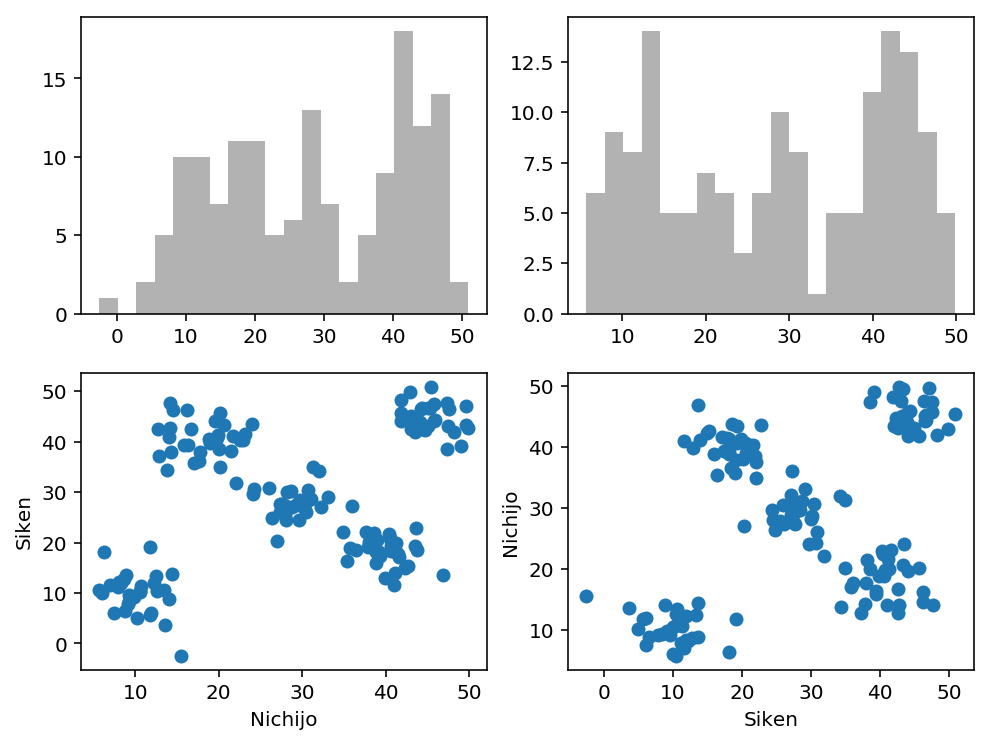

In [3]:
fig = plt.figure(figsize=(8,6))
# サブプロットを追加
ax1 = fig.add_subplot(2,2,1)
ax2 = fig.add_subplot(2,2,2)
ax3 = fig.add_subplot(2,2,3)
ax4 = fig.add_subplot(2,2,4)
ax1.hist(df['Siken'],bins=20,color='k',alpha=0.3) # 試験点のヒストグラム
ax2.hist(df['Nichijo'],bins=20,color='k',alpha=0.3) # 日常点のヒストグラム
ax3.scatter(df['Nichijo'],df['Siken']) # 　日常点と試験の相関
ax3.set_xlabel("Nichijo")
ax3.set_ylabel("Siken")
ax4.scatter(df['Siken'],df['Nichijo'])
ax4.set_xlabel("Siken")
ax4.set_ylabel("Nichijo")
plt.show()

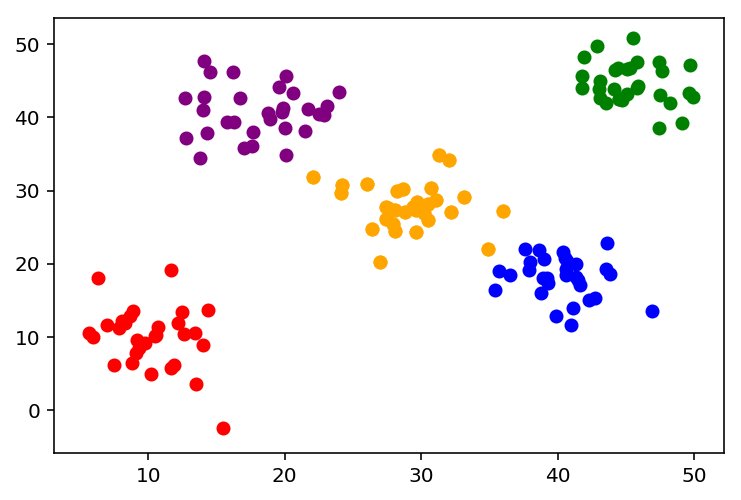

In [4]:
dx,dy,rk = np.array(df['Nichijo']),np.array(df['Siken']),np.array(df['Rank'])
fig = plt.figure()
plt.scatter(dx[df['Rank']=='A'], dy[df['Rank']=='A'], c="green")
plt.scatter(dx[df['Rank']=='B'], dy[df['Rank']=='B'], c="blue")
plt.scatter(dx[df['Rank']=='C'], dy[df['Rank']=='C'], c="orange")
plt.scatter(dx[df['Rank']=='C'], dy[df['Rank']=='C'], c="orange")
plt.scatter(dx[df['Rank']=='D'], dy[df['Rank']=='D'], c="purple")
plt.scatter(dx[df['Rank']=='E'], dy[df['Rank']=='E'], c="red")
plt.show()

# k-means 法でクラスタリングしてみる

In [7]:
# データの数値部分のみを抽出
data = df.T[0:2].T
data.head()

# k-means 法実行メソッド　 ｋ:　クラス数、 itr: クラスタ更新回数  
def go(k,itr):
    global result
    km = KMeans(n_clusters=k,init='random',n_init=1,max_iter=itr,random_state=1)
    result = km.fit(data)
    fig = plt.figure()
 
    print(u"クラスタ重心\n",np.round([km.cluster_centers_[:,0],km.cluster_centers_[:,1]],2))
    plt.scatter(km.cluster_centers_[:,0],km.cluster_centers_[:,1],marker='X',c='black')
    plt.scatter(dx[result.labels_==0.0], dy[result.labels_==0.0], c="green")
    plt.scatter(dx[result.labels_==1.0], dy[result.labels_==1.0], c="blue")
    plt.scatter(dx[result.labels_==2.0], dy[result.labels_==2.0],c="orange")
    plt.scatter(dx[result.labels_==3.0], dy[result.labels_==3.0],c="purple")
    plt.scatter(dx[result.labels_==4.0], dy[result.labels_==4.0],c="red") 
    plt.show()
    return result

# ２クラスタ分割

クラスタ重心
 [[ 35.78  11.86]
 [ 31.75  20.1 ]]


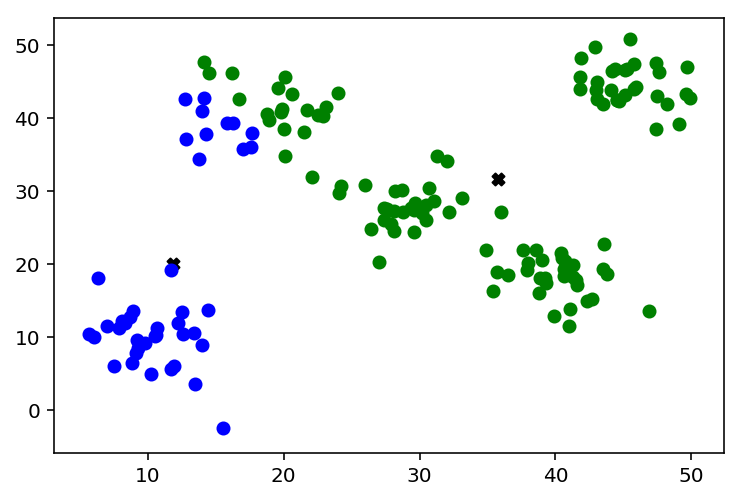

クラスタ重心
 [[ 35.03  11.51]
 [ 32.26  17.61]]


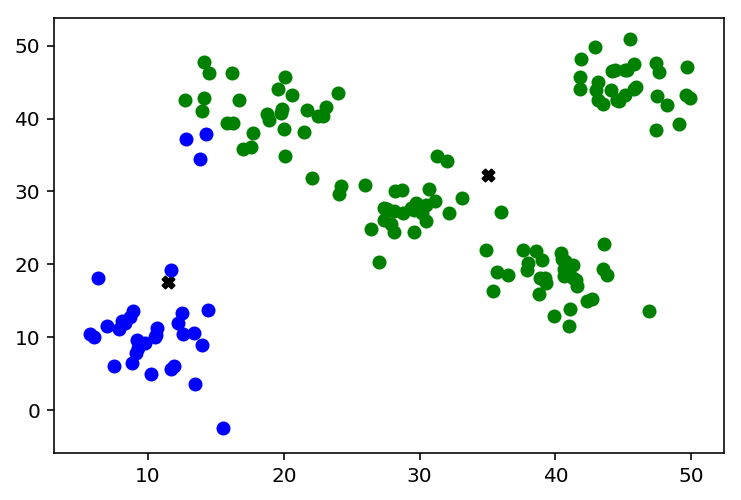

クラスタ重心
 [[ 33.71  10.51]
 [ 32.75  12.33]]


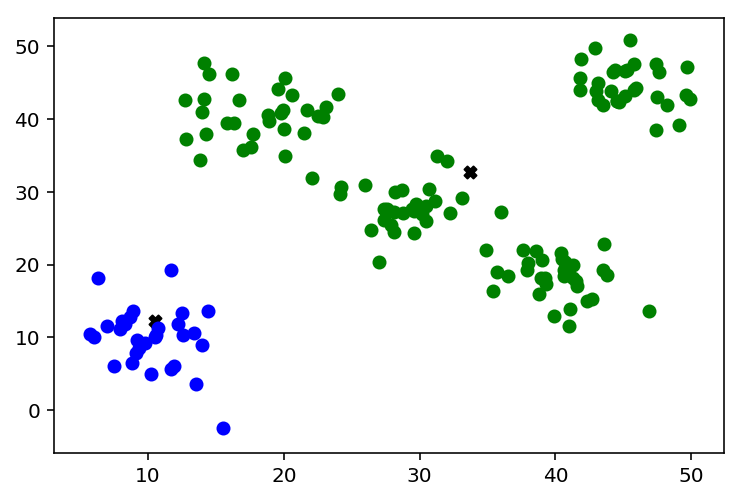

In [8]:
go(2,1);
go(2,2);
go(2,3);

# 課題１　３クラスタ、４クラスタも試してみよ

クラスタ重心
 [[ 32.68  11.35  18.83  45.3 ]
 [ 25.18  18.09  41.42  41.56]]


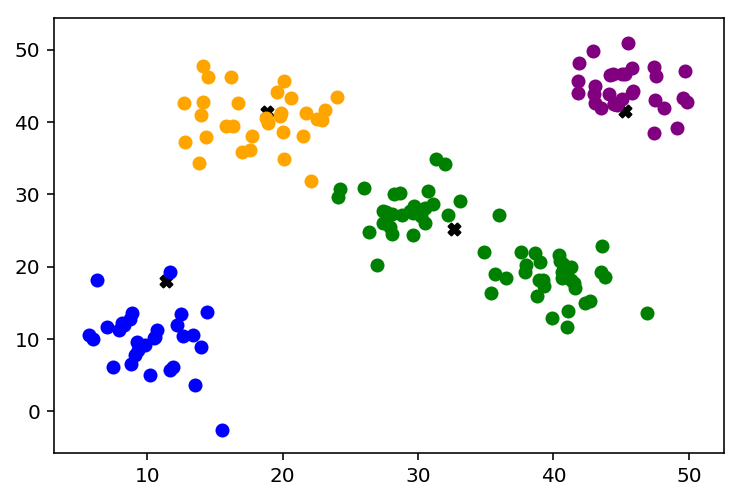

クラスタ重心
 [[ 34.9   10.2   18.17  45.41]
 [ 22.86   9.91  40.43  44.63]]


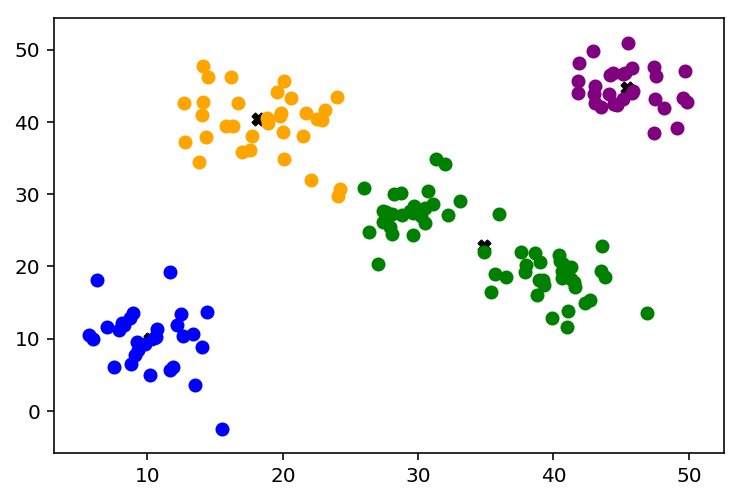

クラスタ重心
 [[ 35.27  10.2   18.53  45.41]
 [ 22.61   9.91  39.81  44.63]]


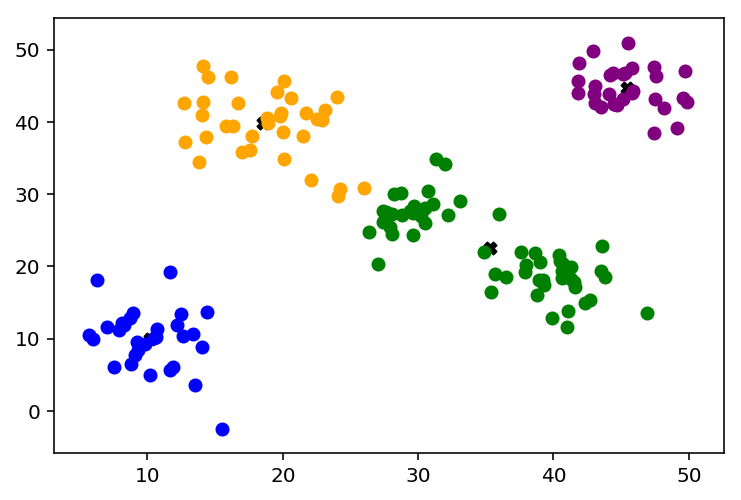

In [10]:
go(4,1);
go(4,2);
go(4,3);


# ５クラスタ

クラスタ重心
 [[ 25.45  10.99  18.83  45.41  33.01]
 [ 34.34  21.03  41.42  44.63  19.13]]


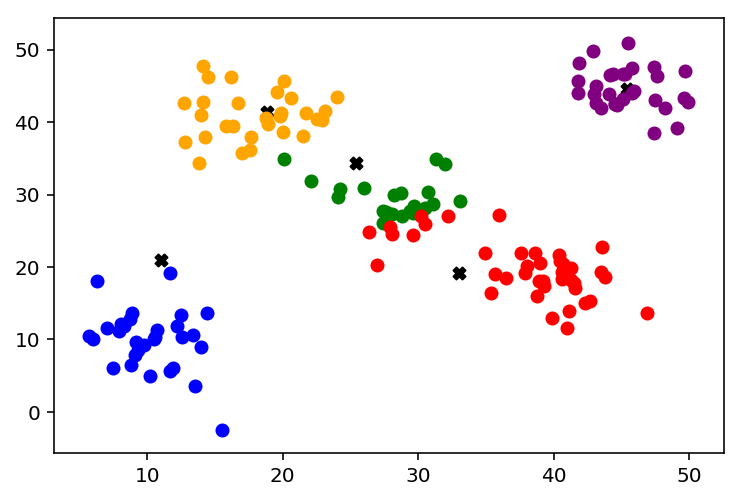

クラスタ重心
 [[ 28.1   10.2   17.97  45.41  37.78]
 [ 29.67   9.91  40.92  44.63  19.82]]


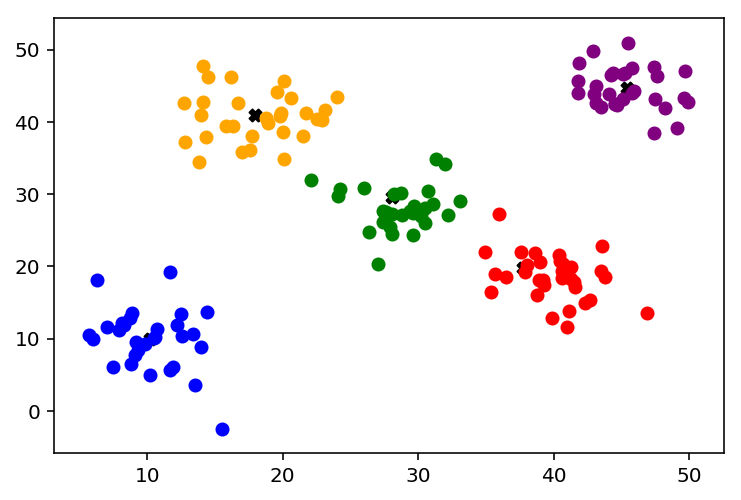

クラスタ重心
 [[ 28.64  10.2   18.04  45.41  39.97]
 [ 28.13   9.91  40.72  44.63  18.53]]


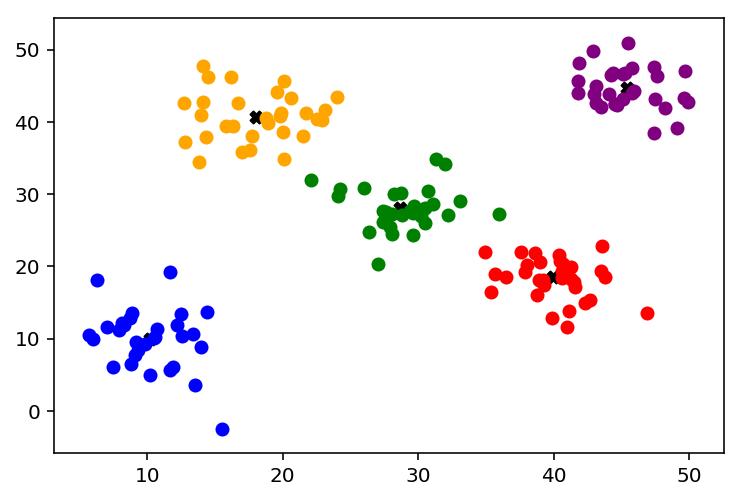

In [12]:
for i in range(3):
    go(5,i+1)

# 実験２　グループの要素数に偏りがある場合

In [13]:
# ダミーデータの生成　　　　出席点、課題点、試験点
np.random.seed(1)
data1 = np.round(np.random.multivariate_normal([50,50],[[20,0],[0,30]],1000),1) 
data2 = np.round(np.random.multivariate_normal([70,42],[[5,0],[0,5]],30),1) 
data3 = np.round(np.random.multivariate_normal([70,58],[[5,0],[0,5]],30),1)  
data = np.r_[data1,data2,data3]
rank = np.r_[np.array(['A']*1000),np.array(['B']*30),np.array(['C']*30)]
df = pd.DataFrame(data,columns=['X','Y'])
df['Label']=rank
df= df.reindex(np.random.permutation(df.index)).reset_index(drop=True)
df.head(5) #  頭から 5個だけ表示

,X,Y,Label
0,47.3,53.4,A
1,52.3,48.0,A
2,49.5,49.6,A
3,54.8,56.4,A
4,52.9,48.3,A


# 分布の確認

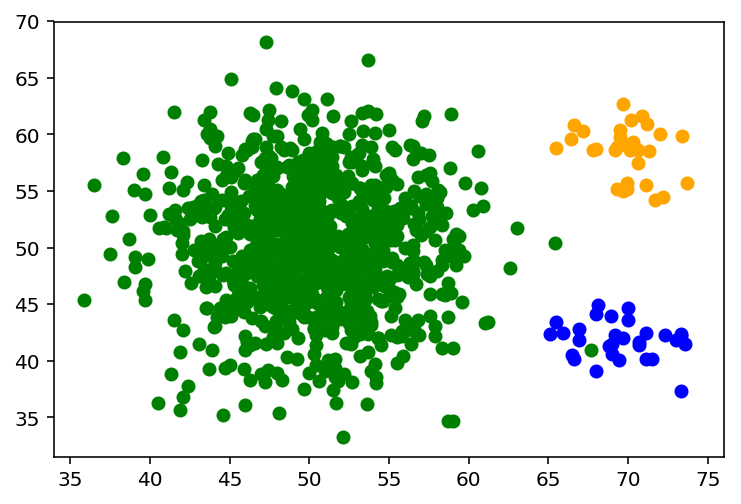

In [14]:
dx,dy,rk = np.array(df['X']),np.array(df['Y']),np.array(df['Label'])
fig = plt.figure()
plt.scatter(dx[df['Label']=='A'], dy[df['Label']=='A'], c="green")
plt.scatter(dx[df['Label']=='B'], dy[df['Label']=='B'], c="blue")
plt.scatter(dx[df['Label']=='C'], dy[df['Label']=='C'], c="orange")
plt.show()

# 数値データ部分だけを抽出¶

# k-means　法によるクラスタリング

In [15]:
data = df.T[0:2].T
data.head()

def d(n,itr):
    global result
    km = KMeans(n_clusters=n,init='random',n_init=1,max_iter=itr,random_state=1)
    result = km.fit(data)
    fig = plt.figure()
 
    print(np.round([km.cluster_centers_[:,0],km.cluster_centers_[:,1]],2))
    plt.scatter(km.cluster_centers_[:,0],km.cluster_centers_[:,1],marker='X',c='black')
    plt.scatter(dx[result.labels_==0.0], dy[result.labels_==0.0], c="green")
    plt.scatter(dx[result.labels_==1.0], dy[result.labels_==1.0], c="blue")
    plt.scatter(dx[result.labels_==2.0], dy[result.labels_==2.0],c="orange")
    plt.scatter(dx[result.labels_==3.0], dy[result.labels_==3.0],c="purple")
    plt.show()
    return result

## 3クラスタに分割

[[ 50.63  68.76  48.79]
 [ 47.54  51.55  56.57]]


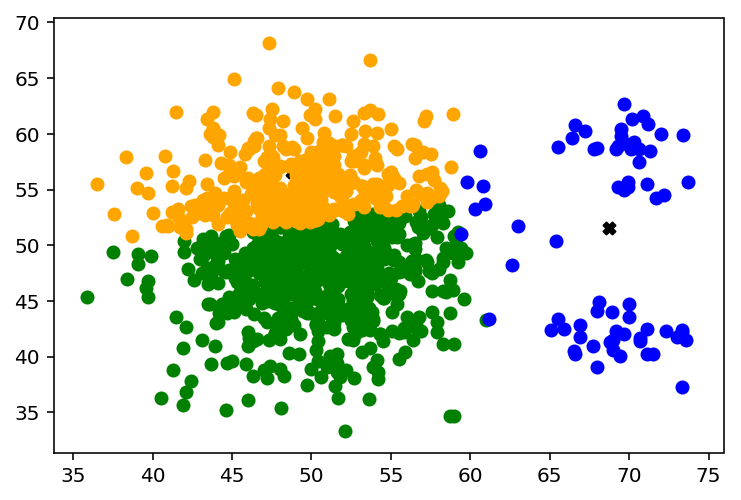

In [16]:
d(3,1);

[[ 50.06  67.37  49.73]
 [ 45.63  50.1   54.53]]


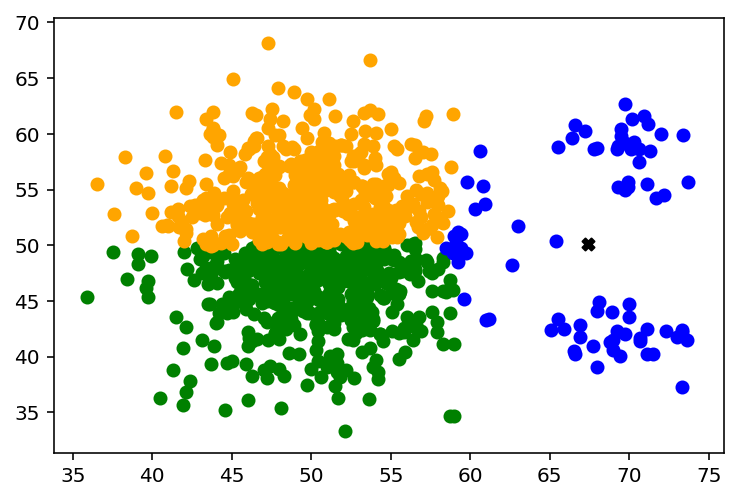

In [17]:
d(3,10);

# 課題２
{(0,0), (0,1), (0,2),(4,0), (4,1), (4,2)} をk-means 法で２つにクラスタリングせよ

In [18]:
Z = np.array([(0,0), (0,1), (0,2),(4,0), (4,1), (4,2)])
def d(itr):
    km = KMeans(n_clusters=2,init='random',n_init=2,max_iter=itr,random_state=0)
    result=km.fit(Z)
    fiig = plt.figure()
    plt.scatter(km.cluster_centers_[:,0],km.cluster_centers_[:,1],marker='X',c='black')
    plt.scatter(Z[:,0][result.labels_==0.0], Z[:,1][result.labels_==0.0], c="green")
    plt.scatter(Z[:,0][result.labels_==1.0], Z[:,1][result.labels_==1.0], c="blue")
    plt.show()
    return result

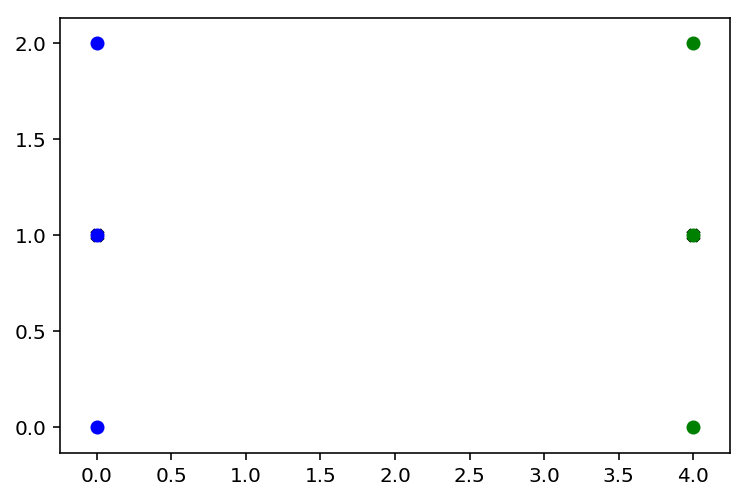

In [19]:
d(1);